### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns

### Read the dataset

In [2]:
data=pd.read_csv("car data.csv")

In [3]:
data.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


In [4]:
data.shape

(301, 9)

In [5]:
for i in ["Seller_Type","Transmission","Owner"]:
    print(data[i].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


### Check the missing values

In [6]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### Print the description of the data

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [8]:
data["current_year"]=2023

In [9]:
data["total_years"]=data["current_year"]-data["Year"]

In [10]:
data.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,total_years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10


In [11]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'current_year',
       'total_years'],
      dtype='object')

In [12]:
final_data=data[['Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner','total_years']]

In [13]:
final_data.head(2)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,total_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10


In [14]:
final_data=pd.get_dummies(final_data,drop_first=True,dtype=int)

In [15]:
final_data

,Selling_Price,Present_Price,Kms_Driven,Owner,total_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,7,1,0,0,1
297,4.00,5.90,60000,0,8,0,1,0,1
298,3.35,11.00,87934,0,14,0,1,0,1
299,11.50,12.50,9000,0,6,1,0,0,1


### find the correlation between data

In [16]:
final_data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,total_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
total_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


d:\CAR_PRICE_PREDICTION\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


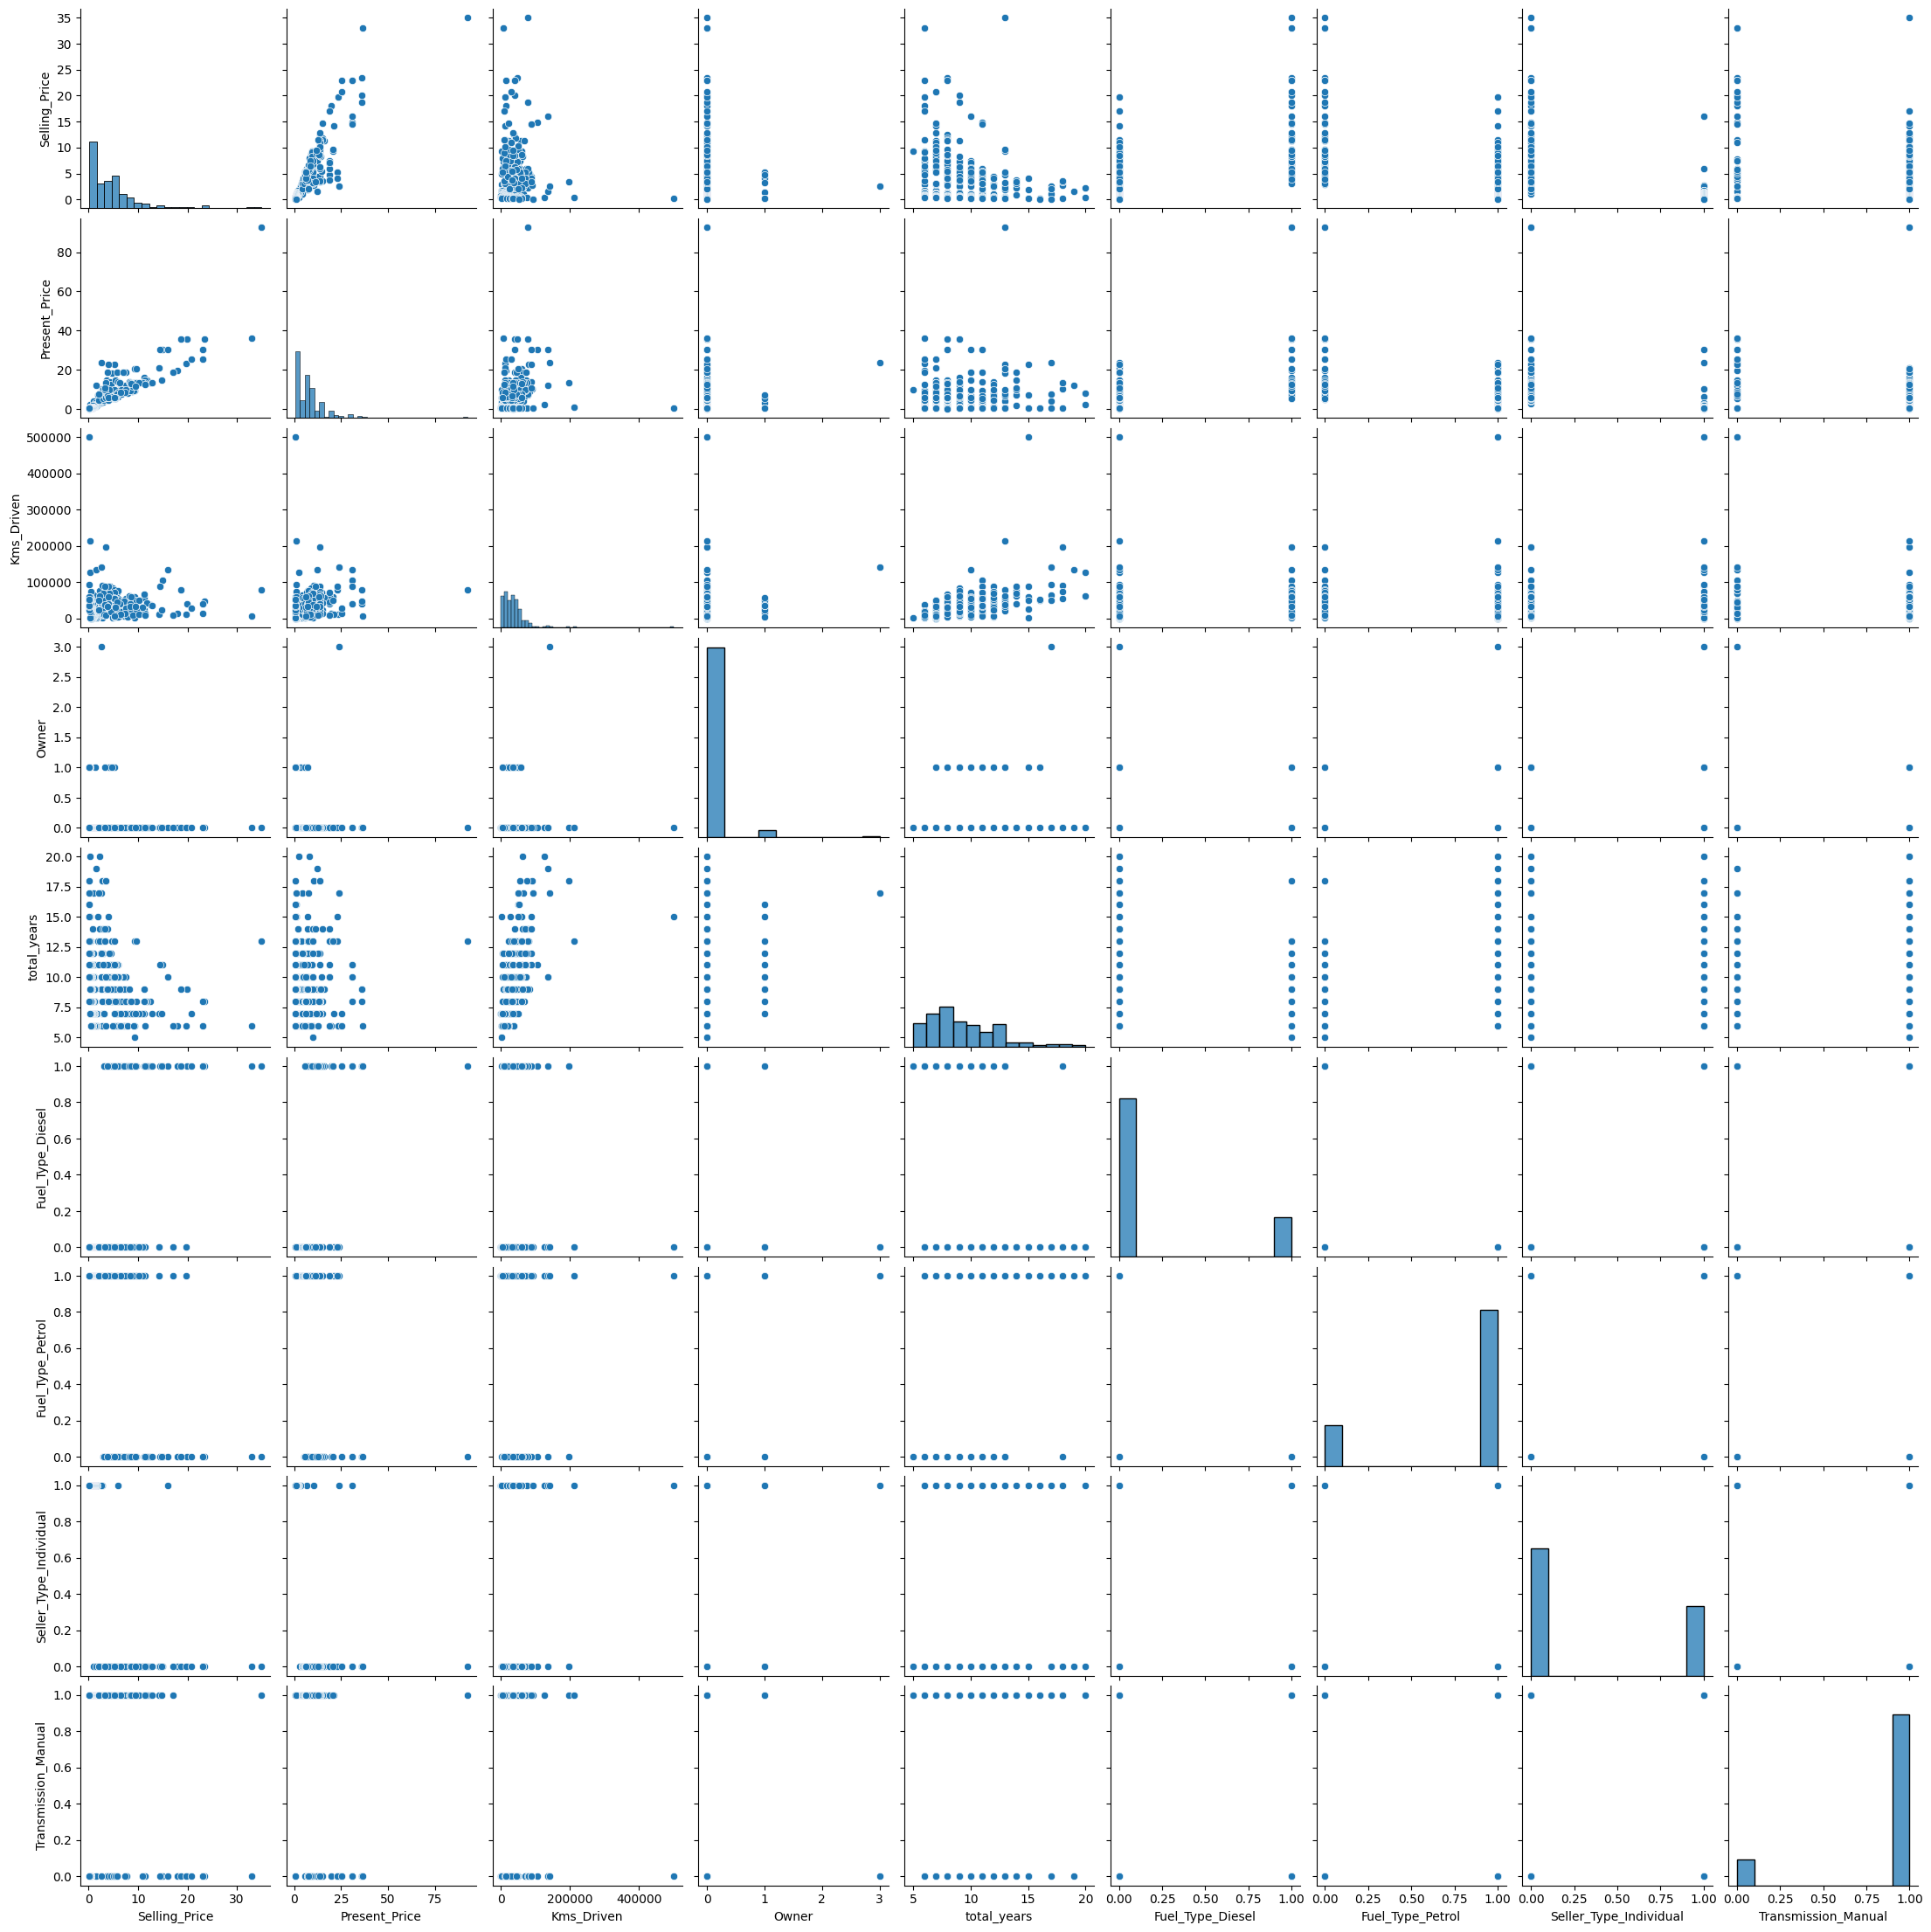

In [17]:
sns.pairplot(final_data)

<Axes: >

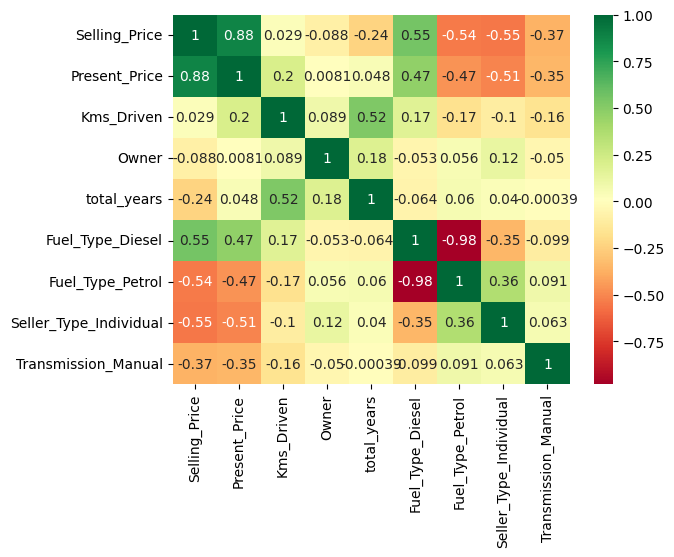

In [18]:
cordata=final_data.corr()
top=cordata.index
g=sns.heatmap(final_data[top].corr(),annot=True,cmap="RdYlGn")
g

### Print first 2 final data

In [19]:
final_data.head(2)

,Selling_Price,Present_Price,Kms_Driven,Owner,total_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1


### Seperate input and output data
iloc[row,column]
      |     |
iloc[ : ,   :  ]

In [20]:
X=final_data.iloc[:,1:]
y=final_data.iloc[:,0]

### Print the shape of X and y

In [21]:
print("The shape of X is ",X.shape)
print("The shape of y is ",y.shape)

The shape of X is  (301, 8)
The shape of y is  (301,)


### To find the important features we use ensemble technique

In [22]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

### Here we are printing the importace of each column.

In [23]:
print(model.feature_importances_)

[0.37436467 0.0392315  0.00044205 0.07654464 0.22088923 0.01735267
 0.1308589  0.14031633]


In [24]:
import matplotlib.pyplot as plt

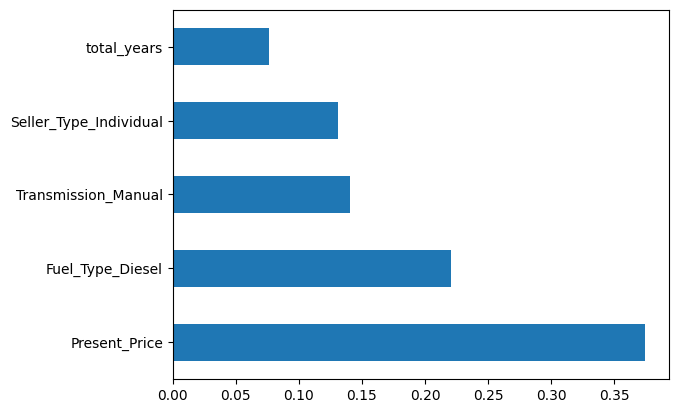

In [25]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns) 
feat_importances.nlargest(5).plot(kind='barh') 
plt.show()

### Train test split


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [28]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [29]:
import numpy as np

In [37]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [38]:
from sklearn.model_selection import RandomizedSearchCV

### Create the random grid

In [39]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [40]:
rf=RandomForestRegressor()

### Random search of parameters, using 3 fold cross validation, 
### search across 100 different combinations

In [41]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [42]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

d:\CAR_PRICE_PREDICTION\venv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "d:\CAR_PRICE_PREDICTION\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\CAR_PRICE_PREDICTION\venv\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "d:\CAR_PRICE_PREDICTION\venv\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "d:\CAR_PRICE_PREDICTION\ven

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [46]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [44]:
prediction=rf_random.predict(X_test)
prediction

array([ 0.9132 ,  3.9807 ,  0.74651, 11.66901,  3.33577,  6.00565,
        0.77564,  2.73297,  0.656  ,  0.76014,  3.30425,  1.26261,
        4.4112 ,  4.83815,  8.13257,  5.26884,  2.51804,  5.91975,
        6.44075,  3.8126 ,  3.96963,  6.0101 ,  0.61126,  1.12296,
        0.57485,  7.43732,  0.53446,  5.47865,  3.17065,  7.46857,
        8.47925,  4.90415,  0.54421,  7.49578,  7.40117, 11.2599 ,
       21.85158,  3.8555 ,  0.69914,  0.7839 ,  1.19881, 21.01493,
        2.88785,  0.22169,  4.92785,  5.139  ,  1.3555 ,  5.99479,
        5.40275,  2.74704,  4.32225,  4.35825, 19.48286,  8.20787,
        0.53377,  0.99738,  0.51646,  2.68283,  5.36666,  3.60056,
        4.8461 ])

C:\Users\thoma\AppData\Local\Temp\ipykernel_19984\1520944062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<Axes: xlabel='Selling_Price', ylabel='Density'>

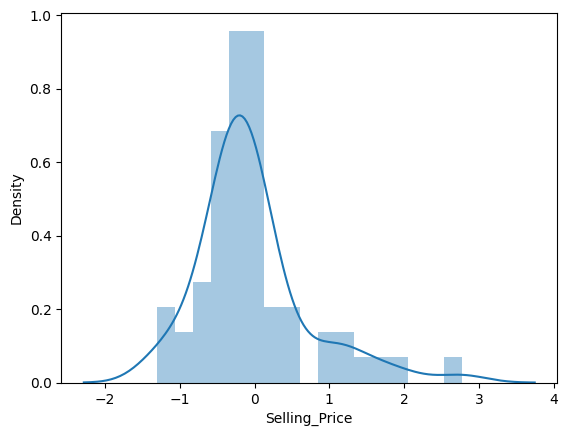

In [48]:
sns.distplot(y_test-prediction)

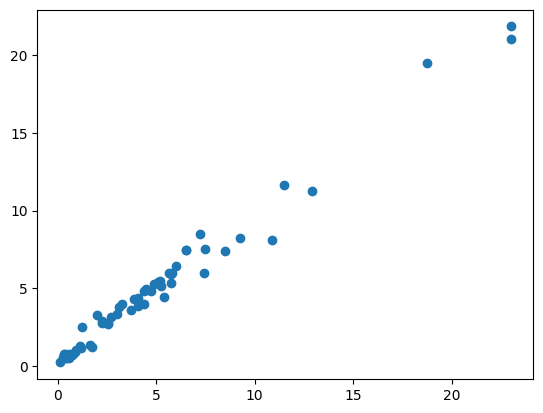

In [49]:
plt.scatter(y_test,prediction)

In [50]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)